# Creation of Binary model to predict DISEASE / NO DISEASE - using hand made model

## PRELIMINARY ACTION !

⚠️ Please go to ➤ https://drive.google.com/file/d/1lLrHbpUQE-Kd-jZ68Uk7SFwawbzqf6Av/view?usp=drive_link

and download the dataset.

Put the zip file into your "*raw_data*" folder

## data loading

In [5]:
import numpy as np
import pandas as pd
import pdb

import os
from pathlib import Path
from PIL import Image

### Loading images

In [6]:
PROJECT_NAME = "chest-predictor" #to be adapted depending on the name of the Project Name in your system
NUMBER_OF_IMAGES = 5000 # nbr of images to be loaded or 'full' to load the entire dataset (+100k images)

In [7]:
USERNAME = os.environ.get('USER')

In [8]:
LOCAL_DATA_PATH = Path(f"/Users/{USERNAME}/code/sachamagier/{PROJECT_NAME}/raw_data/resized_dataset")

In [9]:
print(f"LOCAL_DATA_PATH: {LOCAL_DATA_PATH}")

LOCAL_DATA_PATH: /Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/resized_dataset


In [10]:
def loading_data():
    """This function either get all the images if the user set NUMBER_OF_IMAGES
    to 'full' or the number of imgaes otherwise """

    images_data = []

    # Define the path to the folder
    folder_path = f'../raw_data/resized_dataset/images/set_full/'

    
    # Get a list of all files in the folder
    file_list = os.listdir(folder_path)

    # Filter the list to only include image files
    image_files = [f for f in file_list if f.endswith('.png') or f.endswith('.jpg') or f.endswith('.jpeg')]


    # Loop through the first NUMBER_OF_IMAGES
    for i, image_file in enumerate(image_files):

        # Stop the loop after NUMBER_OF_IMAGES iterations
        if i == NUMBER_OF_IMAGES:
            break

        # Open the image file
        with Image.open(folder_path + image_file) as image:
            # Add the image to the list
            images_data.append((image_file, np.array(image)))

    return images_data

In [11]:
import urllib.request
import zipfile
import shutil


if LOCAL_DATA_PATH.is_dir():
    print("Load local data...")
    # loading data into data
    images_data = loading_data()
else:
    print("Unziping file and loading the data...")

    output_path = "../raw_data/resized_dataset.zip"
    # unzip the file
    with zipfile.ZipFile(output_path, "r") as zip_ref:
        for file_info in zip_ref.infolist():
            zip_ref.extract(file_info, "../raw_data/")
            
    if Path("../raw_data/__MACOSX").is_dir():
        # remove the __MACOSX folder if it exists
        shutil.rmtree("../raw_data/__MACOSX")
        
    # remove the zip file
    os.remove(output_path)
    images_data = loading_data()

print("data loaded.")

Load local data...
data loaded.


In [12]:
# Create a dataframe from the list of images and their indices
images_df = pd.DataFrame(images_data, columns=['Image Index', 'image'])

# Set the index of the dataframe to the 'Image Index' column
images_df = images_df.set_index('Image Index').sort_index(ascending=True)

In [13]:
images_df.shape

(5000, 1)

In [14]:
images_df['image'][0].shape

/var/folders/0j/t72j59vs3k5_8l11kqqvpvkc0000gn/T/ipykernel_61008/4042123707.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  images_df['image'][0].shape


(256, 256)

In [39]:
images_df['image'] = images_df['image'].apply(lambda x: x / 255.0)

In [40]:
images_df['image']

Image Index
00000007_000.png    [[0.06666666666666667, 0.11764705882352941, 0....
00000013_008.png    [[0.0196078431372549, 0.027450980392156862, 0....
00000013_020.png    [[0.16862745098039217, 0.13333333333333333, 0....
00000013_034.png    [[0.0392156862745098, 0.0392156862745098, 0.03...
00000017_000.png    [[0.06666666666666667, 0.07058823529411765, 0....
                                          ...                        
00030720_004.png    [[0.0196078431372549, 0.023529411764705882, 0....
00030721_000.png    [[0.00784313725490196, 0.11764705882352941, 0....
00030731_000.png    [[0.09411764705882353, 0.043137254901960784, 0...
00030753_001.png    [[0.2549019607843137, 0.19607843137254902, 0.1...
00030788_000.png    [[0.42745098039215684, 0.3411764705882353, 0.2...
Name: image, Length: 5000, dtype: object

### Loading labels data

In [41]:
labels_df = pd.read_csv('../raw_data/resized_dataset/Data_Entry_2017.csv')

In [42]:
labels_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [43]:
unique_lab = labels_df['Finding Labels'].unique()

In [44]:
len(unique_lab)

836

### Merging Images with labels and creating a new DF

In [45]:
# Merge the image_df and labels_df dataframes on the 'Image Index' column
merged_df = pd.merge(images_df, labels_df[['Image Index', 'Finding Labels']], left_index=True, right_on='Image Index', how='inner')

# Rename the 'Finding Labels' column to 'labels'
merged_df = merged_df.rename(columns={'Finding Labels': 'labels'})

# Set the index of the dataframe to the 'Image Index' column
merged_df = merged_df.set_index('Image Index').sort_index(ascending=True)

In [46]:
merged_df.head()

,image,labels
Image Index,,
00000007_000.png,"[[0.06666666666666667, 0.11764705882352941, 0....",No Finding
00000013_008.png,"[[0.0196078431372549, 0.027450980392156862, 0....",No Finding
00000013_020.png,"[[0.16862745098039217, 0.13333333333333333, 0....",Pneumothorax
00000013_034.png,"[[0.0392156862745098, 0.0392156862745098, 0.03...",Emphysema|Pneumothorax
00000017_000.png,"[[0.06666666666666667, 0.07058823529411765, 0....",Effusion|Infiltration|Nodule


### droping the rows with images of shape (256, 256, 4)

In [47]:
# Find the images with shape (256, 256, 4)
images_with_shape_4 = [img for img in merged_df['image'] if np.shape(img) == (256, 256, 4)]

# Print the number of images with shape (256, 256, 4)
print(len(images_with_shape_4))


0


In [48]:
# Find the indices of the images with shape (256, 256, 4)
indices_to_drop = merged_df[merged_df['image'].apply(lambda x: np.shape(x) == (256, 256, 4))].index

# Drop the rows with the images with shape (256, 256, 4)
merged_df = merged_df.drop(indices_to_drop)

In [49]:
# Find the images with shape (256, 256, 4)
images_with_shape_4 = [img for img in merged_df['image'] if np.shape(img) == (256, 256, 4)]

# Print the number of images with shape (256, 256, 4)
print(len(images_with_shape_4))

0


### Encoding labels

In [50]:
# Define the list of labels
labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema',
           'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening',
           'Cardiomegaly', 'Nodule', 'Mass', 'Hernia', 'No Finding']

# Create a new dataframe with one-hot encoded columns for the labels
one_hot_df = merged_df['labels'].str.get_dummies(sep='|')

# Concatenate the one-hot encoded dataframe with the original dataframe
merged_df = pd.concat([merged_df, one_hot_df], axis=1)


In [51]:
merged_df.columns

Index(['image', 'labels', 'Atelectasis', 'Cardiomegaly', 'Consolidation',
       'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'],
      dtype='object')

## Creating 'X' and 'y'

In [52]:
y = one_hot_df[['No Finding']]

In [89]:
y.tail(50)

,No Finding
Image Index,
00030300_006.png,0
00030300_007.png,0
00030300_012.png,0
00030323_008.png,0
00030323_034.png,0
00030327_000.png,0
00030337_000.png,0
00030345_000.png,1
00030355_000.png,0


In [54]:
X = merged_df['image']

In [55]:
X.info(memory_usage='deep')

<class 'pandas.core.series.Series'>
Index: 5000 entries, 00000007_000.png to 00030788_000.png
Series name: image
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   object
dtypes: object(1)
memory usage: 2.4 GB


In [56]:
X = np.array([np.reshape(img, (256, 256, 1)) for img in X])

In [57]:
X.shape

(5000, 256, 256, 1)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42, stratify=y_train)

## Model

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 conv2d_16 (Conv2D)          (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 126, 126, 64)      0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 126, 126, 64)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    batch_size=16, 
                    epochs=30,   
                    validation_data=(X_val, y_val),
                    callbacks=[es],
                    verbose=1)

Epoch 1/30
186/186 [==============================] - 168s 901ms/step - loss: 0.7917 - accuracy: 0.5237 - val_loss: 0.6916 - val_accuracy: 0.5295
Epoch 2/30
186/186 [==============================] - 176s 948ms/step - loss: 0.6881 - accuracy: 0.5439 - val_loss: 0.6817 - val_accuracy: 0.5295
Epoch 3/30
186/186 [==============================] - 195s 1s/step - loss: 0.6785 - accuracy: 0.5576 - val_loss: 0.6748 - val_accuracy: 0.5543
Epoch 4/30
186/186 [==============================] - 182s 979ms/step - loss: 0.6818 - accuracy: 0.5704 - val_loss: 0.6746 - val_accuracy: 0.5695
Epoch 5/30
186/186 [==============================] - 183s 985ms/step - loss: 0.6720 - accuracy: 0.5815 - val_loss: 0.6697 - val_accuracy: 0.5848
Epoch 6/30
186/186 [==============================] - 180s 966ms/step - loss: 0.6716 - accuracy: 0.5953 - val_loss: 0.6818 - val_accuracy: 0.5657
Epoch 7/30
186/186 [==============================] - 188s 1s/step - loss: 0.6640 - accuracy: 0.6067 - val_loss: 0.6636 - val_a

In [86]:
# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test accuracy: {test_accuracy}")

47/47 - 22s - loss: 0.6525 - accuracy: 0.6253 - 22s/epoch - 458ms/step
Test accuracy: 0.625333309173584


In [76]:
img_path = '/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/raw_dataset/images_001/images/00000003_004.png'  # replace with your image path


1/1 [==============================] - 0s 31ms/step


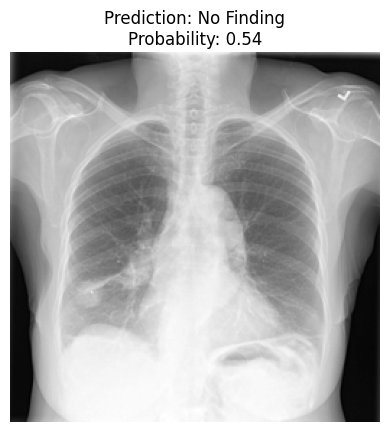

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the image
img_path = '/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00030659_000.png'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(256, 256), color_mode = "grayscale")

# Preprocess the image (e.g., normalization)
# Assuming that you've preprocessed your training data by dividing the pixel values by 255
x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)  # Add a batch dimension (required by the model)

# Load the saved model
#model_path = "path/to/your/model_file.h5"  # Replace with the path to your saved model
#model = load_model(model_path)

# Make a prediction
probability = model.predict(x)[0, 0]

# Convert the probability to a binary label (0 or 1)
label = int(probability >= 0.5)

# Display the image and the prediction result
plt.imshow(img, cmap="gray")
plt.title(f"Prediction: {'No Finding' if label == 1 else 'No Finding'}\nProbability: {probability:.2f}")
plt.axis("off")
plt.show()

In [79]:
probability

0.585111

## Save the model

In [80]:
# Save the entire model (architecture, optimizer state, and weights)
model_filepath = '/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/model_binary_accuracy_058.keras'
model.save(model_filepath)

In [81]:
# Save only the model's weights
weights_filepath = '/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/weight_binary_accuracy_058.keras'
model.save_weights(weights_filepath)

## loading model

In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model (architecture, optimizer state, and weights)
loaded_model = load_model(model_filepath)


In [ ]:
# Create a new instance of the model with the same architecture
new_model = ...  # Define the model architecture as before

# Load the weights into the new model
new_model.load_weights(weights_filepath)
